<img src="https://images.pexels.com/photos/6941884/pexels-photo-6941884.jpeg?cs=srgb&dl=pexels-n-voitkevich-6941884.jpg&fm=jpg" >


# **DATA 606 CDC Diabetes Survey Project Report**

### **By: Sihan Fang, Ekene Ikeora, Zhaoye Liu, Arthur Sumague, Weiwei Wang**

## **Background & Data Selection**

Diabetes is a chronic health condition that affects millions of people worldwide and is a major public health concern due to its association with various complications such as cardiovascular diseases, kidney failure, and nerve damage. Understanding the risk factors and health indicators associated with diabetes is crucial for early detection, prevention, and effective disease management. The CDC Diabetes Health Indicators dataset, sourced from the Behavioral Risk Factor Surveillance System (BRFSS) 2015 survey, provides a comprehensive view of various health metrics linked to diabetes prevalence in the U.S. population.

The dataset, available through the UCI Machine Learning Repository, consists of self-reported health indicators collected from individuals across the United States. It includes variables such as demographic attributes (age, gender, BMI), behavioural factors (smoking, alcohol consumption, physical activity), and pre-existing health conditions (hypertension, high cholesterol, stroke, heart disease, and general health status). These attributes allow for an in-depth exploration of the relationships between lifestyle choices, comorbidities, and the presence of diabetes, making this dataset highly valuable for public health research and predictive modelling.

Given the growing burden of diabetes and the increasing need for data-driven healthcare solutions, analyzing this dataset can provide meaningful insights into risk factors contributing to diabetes onset. By leveraging statistical techniques and machine learning models, researchers and policymakers can identify trends, develop targeted interventions, and improve public health strategies to mitigate the impact of diabetes at a national level. This project aims to explore the dataset thoroughly, assess key predictors of diabetes, and contribute to a deeper understanding of health behaviours influencing diabetes prevalence.

## **Preliminary Data Anslysis / EDA**

Exploratory Data Analysis for Diabetes Analysis focuses on understanding the distribution of key health indicators, detecting patterns, and identifying potential risk factors. By examining distributions, we can observe trends in variables like BMI, age, mental health and physical health, while boxplots help detect outliers and differences across diabetes statuses. A correlation heatmap reveals relationships between features, highlighting significant factors associated with diabetes risk.

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [28]:
# Dataset link
file_id = "1BZyXLGvuuRqvy1pWrGO1NDDN_4dN5Wjv"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the dataset
!wget -O diabetes_data.csv {url}

# Read the dataset
df = pd.read_csv("diabetes_data.csv")

# Display the dataset
df.head()

--2025-02-20 04:15:11--  https://drive.google.com/uc?id=1BZyXLGvuuRqvy1pWrGO1NDDN_4dN5Wjv
Resolving drive.google.com (drive.google.com)... 142.251.167.138, 142.251.167.100, 142.251.167.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BZyXLGvuuRqvy1pWrGO1NDDN_4dN5Wjv [following]
--2025-02-20 04:15:11--  https://drive.usercontent.google.com/download?id=1BZyXLGvuuRqvy1pWrGO1NDDN_4dN5Wjv
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22738151 (22M) [application/octet-stream]
Saving to: ‘diabetes_data.csv’

diabetes_data.csv   100%[===================>]  21.68M  83.0MB/s    in 0.3s    

2025-02-20 04:15:15 (83.

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [29]:
df=pd.read_csv(url)
data_summary = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Missing Values": df.isnull().sum().sum(),
    "Sample Data": df.head()
}
data_summary

{'Shape': (253680, 22),
 'Columns': ['Diabetes_012',
  'HighBP',
  'HighChol',
  'CholCheck',
  'BMI',
  'Smoker',
  'Stroke',
  'HeartDiseaseorAttack',
  'PhysActivity',
  'Fruits',
  'Veggies',
  'HvyAlcoholConsump',
  'AnyHealthcare',
  'NoDocbcCost',
  'GenHlth',
  'MentHlth',
  'PhysHlth',
  'DiffWalk',
  'Sex',
  'Age',
  'Education',
  'Income'],
 'Missing Values': 0,
 'Sample Data':    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0 

### Distribution

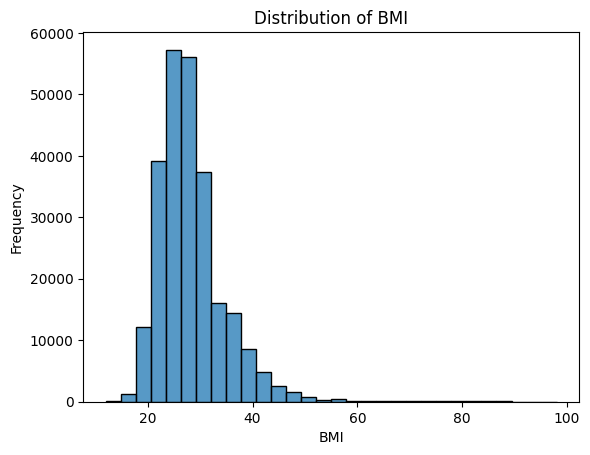

In [30]:
# Histogram for BMI
df=pd.read_csv(url)
sns.histplot(df['BMI'], kde=False, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of BMI values in the dataset, indicating whether most individuals fall within a healthy, underweight, overweight, or obese range.

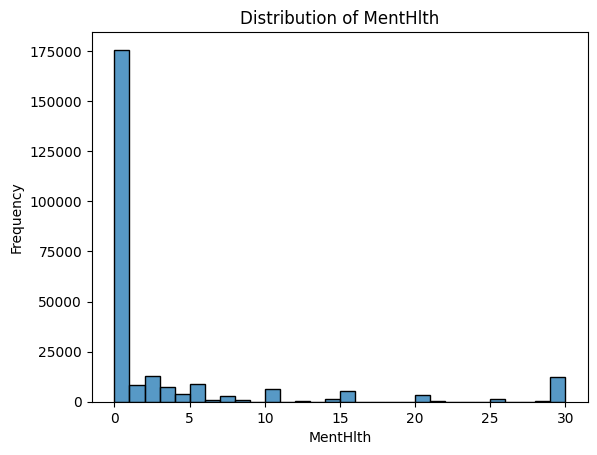

In [31]:
# Histogram for MentHlth
df=pd.read_csv(url)
sns.histplot(df['MentHlth'], kde=False, bins=30)
plt.title('Distribution of MentHlth')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')
plt.show()

The histogram reveals the distribution of poor mental health days among individuals, showing whether most people experience few or frequent mental health challenges.

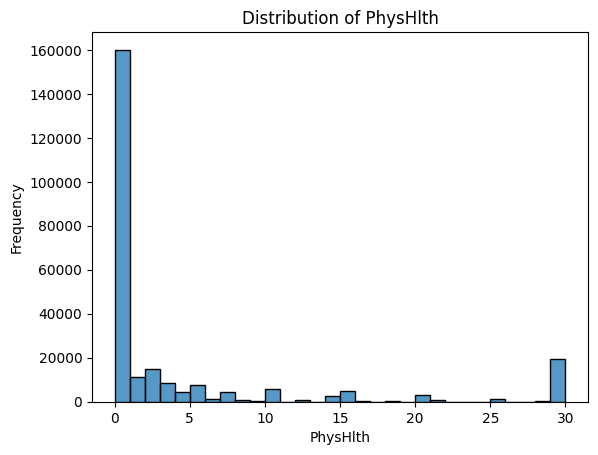

In [32]:
# Histogram for PhysHlth
df=pd.read_csv(url)
sns.histplot(df['PhysHlth'], kde=False, bins=30)
plt.title('Distribution of PhysHlth')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')
plt.show()

The graph shows that most individuals report fewer days of poor physical health, but some experience frequent health issues, indicating variability in overall well-being.

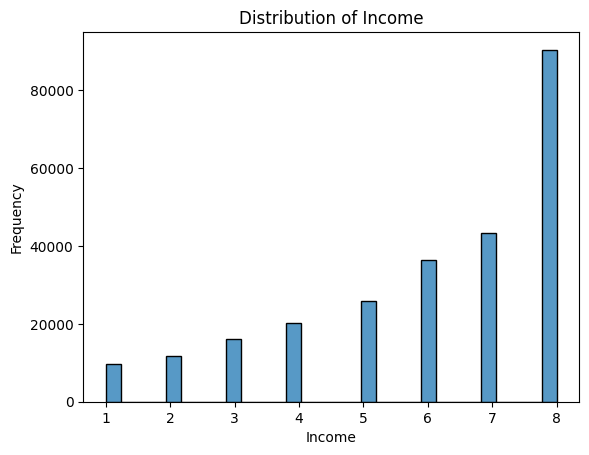

In [33]:
# Histogram for Income
df=pd.read_csv(url)
sns.histplot(df['Income'], kde=False, bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The graph shows that the majority of people have lower incomes, while fewer individuals fall into the higher income range. This distribution suggests a significant concentration in the lower income brackets, highlighting an income disparity in the dataset.

### Barplot

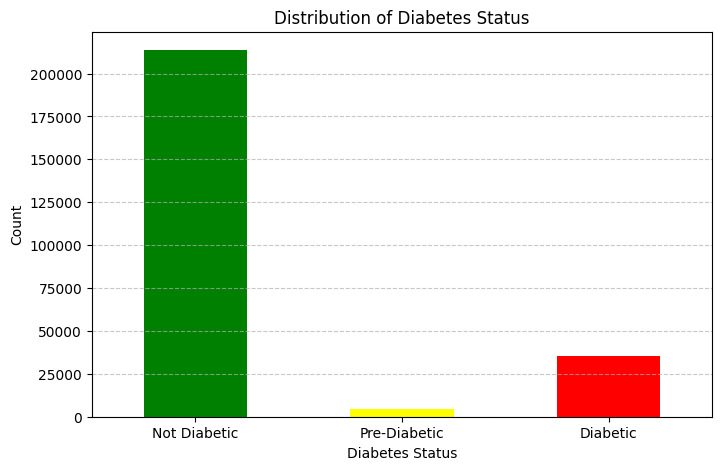

In [34]:
#Distribution of Diabetes Status
diabetes_counts = df['Diabetes_012'].value_counts().sort_index()
labels = {0: "Not Diabetic", 1: "Pre-Diabetic", 2: "Diabetic"}
diabetes_counts.index = [labels[idx] for idx in diabetes_counts.index]
plt.figure(figsize=(8, 5))
diabetes_counts.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Status")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart shows the distribution of individuals who are Not Diabetic, Pre-Diabetic, and Diabetic in the dataset, highlighting potential class imbalances, which could affect statistical analysis and predictive modeling. The chart also provides insights into the prevalence of diabetes-related conditions and can help identify any data inconsistencies.

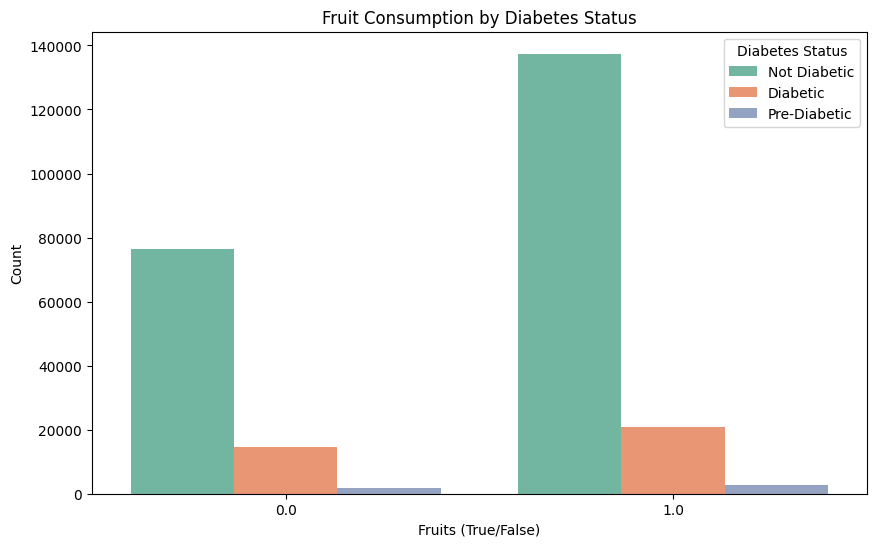

In [35]:
# Fruit Consumption by Diabetes Status
df=pd.read_csv(url)
diabetes_labels = {0: "Not Diabetic", 1: "Pre-Diabetic", 2: "Diabetic"}
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='Fruits', hue='Diabetes_012', data=df, palette='Set2')
plt.title("Fruit Consumption by Diabetes Status")
plt.xlabel("Fruits (True/False)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

The chart shows differences in fruit consumption among individuals with different diabetes statuses, where non-diabetic individuals tend to consume fruits more frequently than diabetics. This trend suggests that individuals with diabetes may have lower fruit intake, possibly due to dietary restrictions or concerns about sugar content.

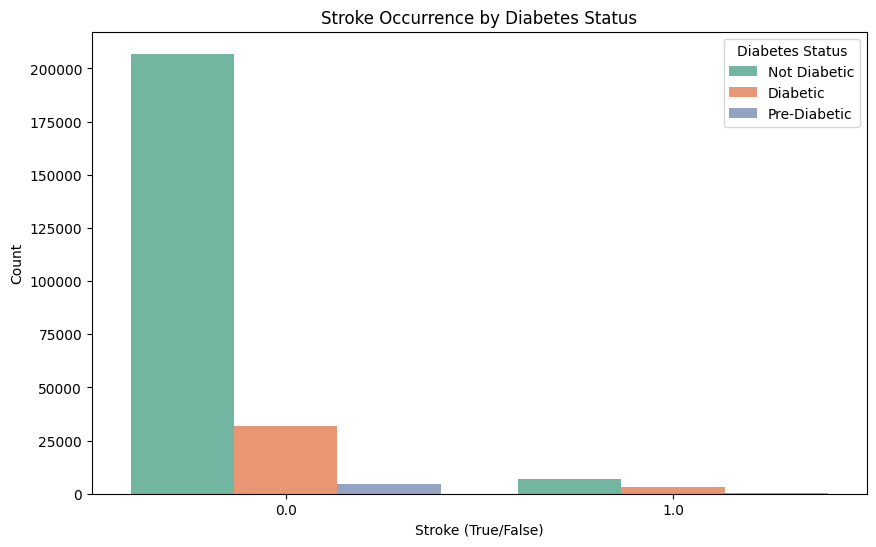

In [36]:
# Stroke Occurrence by Diabetes Status
df=pd.read_csv(url)
diabetes_labels = {0: "Not Diabetic", 1: "Pre-Diabetic", 2: "Diabetic"}
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='Stroke', hue='Diabetes_012', data=df, palette='Set2')
plt.title("Stroke Occurrence by Diabetes Status")
plt.xlabel("Stroke (True/False)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

The chart shows that individuals with diabetes have a higher occurrence of strokes compared to those who are not diabetic or pre-diabetic. This suggests a potential link between diabetes and an increased risk of stroke, which highlights the importance of stroke prevention strategies.

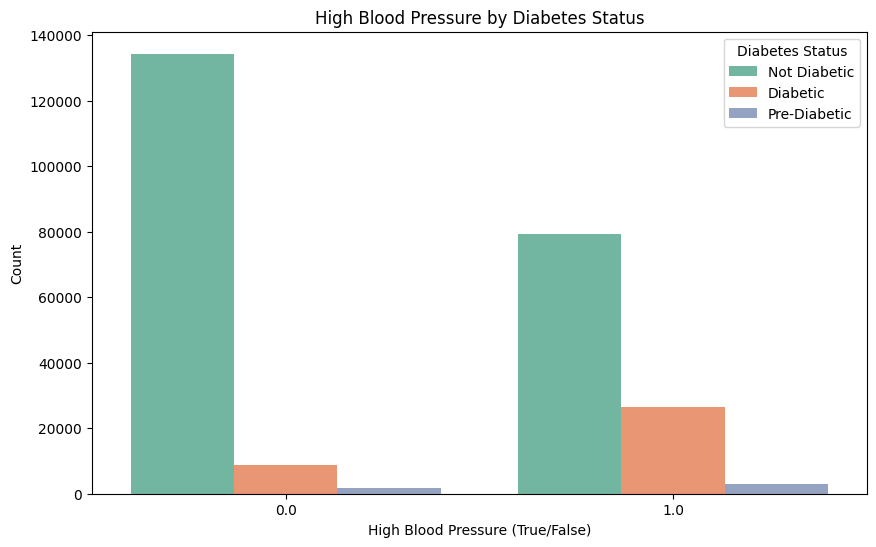

In [37]:
#High Blood Pressure by Diabetes Status
df=pd.read_csv(url)
diabetes_labels = {0: "Not Diabetic", 1: "Pre-Diabetic", 2: "Diabetic"}
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, palette='Set2')
plt.title("High Blood Pressure by Diabetes Status")
plt.xlabel("High Blood Pressure (True/False)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


The chart shows that individuals with diabetes or pre-diabetes have a higher likelihood of having high blood pressure compared to those who are not diabetic. The count of people with high blood pressure is noticeably higher among diabetics, suggesting a possible link between hypertension and diabetes, which emphasizes the importance of blood pressure monitoring for individuals at risk of diabetes.

### Correlation Heatmap

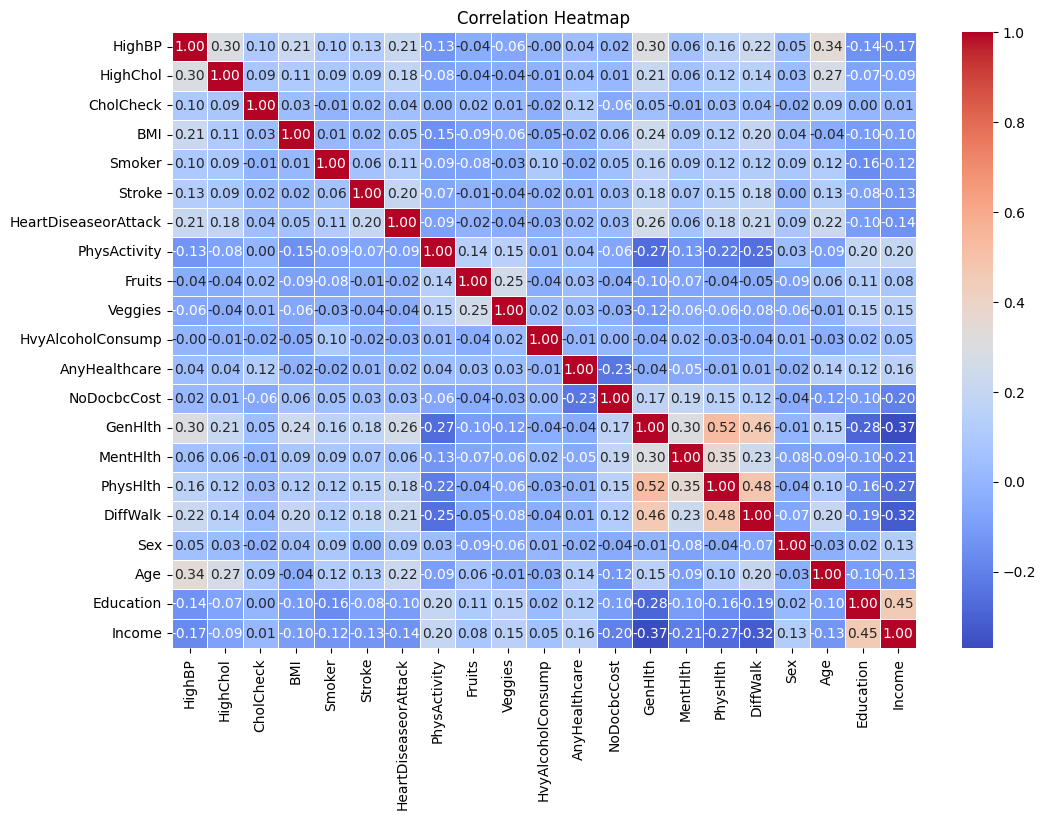

In [38]:
# Correlation heatmap
numeric_data = df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals significant correlations that underscore the interplay between physical health, mobility, and socioeconomic factors in shaping health outcomes. A strong positive correlation between general health (GenHlth) and physical health (PhysHlth) (0.52) highlights that individuals with poorer overall health often face more physical health challenges, emphasizing the centrality of physical well-being in health perceptions. This is further reinforced by the moderate correlation between general health and difficulty walking (DiffWalk) (0.46), suggesting mobility limitations are a critical contributor to diminished health. Additionally, the link between DiffWalk and PhysHlth (0.48) stresses how mobility issues directly impact physical health and quality of life. Socioeconomic factors also play a role, as the moderate correlation between income and education (0.45) indicates that higher education levels may enhance financial stability, indirectly influencing health through improved healthcare access and lifestyle choices. Together, these relationships highlight the need for interventions targeting physical health support, mobility aids, and socioeconomic disparities to holistically improve health outcomes, particularly in populations at risk for conditions like diabetes.

## **Problem Formulation**

### 1. Is the data sampled from the survey reliable and representative of population parameters?

### 2. Can we use the survey questions from the Behavioral Risk Factor Surveillance System (BFRSS) telephone survey, and use a subset of the risk factors to accurately predict whether an individual has diabetes (aka: can we make a predictive model from this dataset?)  

### 3. Do the strongest predictors of diabetes in this dataset align with risk factors commonly identified in medical research?

## **Statistical Analysis & Interpretation:**

### **Guiding Question 1: Is the data sampled from the survey reliable and representative of population parameters?**

#### Part 1: Assessment of Surveying Technique

##### Survey Sampling

The dataset is orignally sourced from the Center for Disease Control's annual telephone suvery to measure behavioural risk factors. This data was collected in the year 2015, amongst all 50 american states plus participating governments; the District of Columbia, Puerto Rico, Guam, and the US Virgin Islands (CDC 2015).

The way the annual survey is conducted is that there are a set of required questionaires. However, each government body (US state or foreign country) can include 'module' questionares (a set of questions) to be added to the mandatory set of questions, to target certain diseases. For the purposes of our interest, we analyze questions pertaining to diabetic disease. Therefore, the consolidated questionaire has been reduced from 330 features to 22 features to target diabetic-relevant health parameters.

The data has also been cleaned by a third-party and has been sourced from Alex Teboul on <a href="https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook">Kaggle</a> (Teboul, A, 2023).

##### Questionnaire

Only the "*important risk factors*" were included in the cleaned final dataset on Kaggle (see About the Data for the source).

Here is a list of the features, cleaning procedures and ending resulting of the data.

<table>
<tbody>
<tr>
<td width="125">
<p>Health Factor</p>
</td>
<td width="125">
<p>Question</p>
</td>
<td width="125">
<p>Raw Data Var</p>
</td>
<td width="125">
<p>Cleaning Steps</p>
</td>
</tr>
<tr>
<td width="125">
<p>Diabetes</p>
</td>
<td width="125">
<p>(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.)</p>
</td>
<td width="125">
<p>DIABETE3</p>
</td>
<td width="125">
<p>Made into ordinal values; 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes.</p>
<p>&nbsp;</p>
<p>Removed all 7 (don&rsquo;t know)</p>
<p>Removed all 9 (refused)</p>
</td>
</tr>
<tr>
<td width="125">
<p>High Blood Pressure</p>
</td>
<td width="125">
<p>Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional</p>
</td>
<td width="125">
<p>_RFHYPE5</p>
</td>
<td width="125">
<p>Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>High Cholesterol</p>
</td>
<td width="125">
<p>Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?</p>
</td>
<td width="125">
<p>TOLDHI2</p>
</td>
<td width="125">
<p>Change 2 to 0 (0 = &lsquo;No&rsquo;)</p>
<p>&nbsp;</p>
<p>Removed all 7 (don&rsquo;t knows)</p>
<p>&nbsp;</p>
<p>Removed all 9 (refused)</p>
</td>
</tr>
<tr>
<td width="125">
<p>High Cholesterol</p>
</td>
<td width="125">
<p>Cholesterol check within past five years</p>
</td>
<td width="125">
<p>_CHOLCHK</p>
</td>
<td width="125">
<p>Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years</p>
<p>&nbsp;</p>
<p>Remove 9</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>BMI</p>
</td>
<td width="125">
<p>Body Mass Index (BMI)</p>
</td>
<td width="125">
<p>_BMI5</p>
</td>
<td width="125">
<p>Divided by 100, original data had it as a percentage not as a ratio</p>
</td>
</tr>
<tr>
<td width="125">
<p>Smoking</p>
</td>
<td width="125">
<p>Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]</p>
</td>
<td width="125">
<p>Smoke100</p>
</td>
<td width="125">
<p>Change 2 to 0 because it is No</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Remove all 7 (dont knows)</p>
<p>&nbsp;</p>
<p>Remove all 9 (refused)</p>
</td>
</tr>
<tr>
<td width="125">
<p>Stroke</p>
</td>
<td width="125">
<p>(Ever told) you had a stroke.</p>
</td>
<td width="125">
<p>CVDSTRK3</p>
</td>
<td width="125">
<p>Change 2 to 0 because it is No</p>
<p><br /> Remove all 7 (dont knows)</p>
<p>&nbsp;</p>
<p>Remove all 9 (refused)</p>
</td>
</tr>
<tr>
<td width="125">
<p>Heart Disease</p>
</td>
<td width="125">
<p>Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)</p>
</td>
<td width="125">
<p>_MICHD</p>
</td>
<td width="125">
<p>Change 2 to 0 because this means did not have MI or CHD</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Physical Activity</p>
</td>
<td width="125">
<p>Adults who reported doing physical activity or exercise during the past 30 days other than their regular job</p>
</td>
<td width="125">
<p>_TOTINDA</p>
</td>
<td width="125">
<p>1 for physical activity</p>
<p>&nbsp;</p>
<p>Change 2 to 0 for no physical activity</p>
<p>&nbsp;</p>
<p>Remove all 9 (don't know/refused)</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Eating Fruits</p>
</td>
<td width="125">
<p>Consume Fruit 1 or more times per day</p>
</td>
<td width="125">
<p>_FRTLT1</p>
</td>
<td width="125">
<p>Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day</p>
<p>&nbsp;</p>
<p>Remove all 7 (dont knows) and 9 (unanswered)</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Eating Vegetables</p>
</td>
<td width="125">
<p>Consume Vegetables 1 or more times per day</p>
</td>
<td width="125">
<p>_VEGLT1</p>
</td>
<td width="125">
<p>Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day</p>
<p>&nbsp;</p>
<p>Remove all dont knows and missing 9</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Alcohol Consumption</p>
</td>
<td width="125">
<p>Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)</p>
</td>
<td width="125">
<p>_RFDRHV5</p>
</td>
<td width="125">
<p>Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)</p>
<p>&nbsp;</p>
<p>Remove all don&rsquo;t knows and missing 9</p>
</td>
</tr>
<tr>
<td width="125">
<p>Health Care</p>
</td>
<td width="125">
<p>Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?</p>
</td>
<td width="125">
<p>HLTHPLN1</p>
</td>
<td width="125">
<p>1 is yes, change 2 to 0 because it is No health care access</p>
<p>&nbsp;</p>
<p>Remove 7 and 9 for don't know or refused</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Regular Checkup</p>
</td>
<td width="125">
<p>Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?</p>
</td>
<td width="125">
<p>MEDCOST</p>
</td>
<td width="125">
<p>Change 2 to 0 for no, 1 is already yes</p>
<p>&nbsp;</p>
<p>Remove 7 for don/t know and 9 for refused</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>General Health</p>
</td>
<td width="125">
<p>Would you say that in general your health is:</p>
</td>
<td width="125">
<p>GENHLTH</p>
</td>
<td width="125">
<p>This is an ordinal variable that I want to keep (1 is Excellent -&gt; 5 is Poor)</p>
<p>&nbsp;</p>
<p>Remove 7 and 9 for don't know and refused</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Mental Health</p>
</td>
<td width="125">
<p>Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?</p>
</td>
<td width="125">
<p>MENTHLTH</p>
</td>
<td width="125">
<p>Already in days so keep that, scale will be 0-30</p>
<p>&nbsp;</p>
<p>Change 88 to 0 because it means none (no bad mental health days)</p>
<p>&nbsp;</p>
<p>Remove 77 and 99 for don't know not sure and refused</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Physical Activity</p>
</td>
<td width="125">
<p>Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?</p>
</td>
<td width="125">
<p>PHYSHLTH</p>
</td>
<td width="125">
<p>Already in days so keep that, scale will be 0-30</p>
<p>&nbsp;</p>
<p>Change 88 to 0 because it means none (no bad mental health days)</p>
<p>&nbsp;</p>
<p>Remove 77 and 99 for don't know not sure and refused</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Difficulty Walking</p>
</td>
<td width="125">
<p>Do you have serious difficulty walking or climbing stairs?</p>
</td>
<td width="125">
<p>DIFFWALK</p>
</td>
<td width="125">
<p>Change 2 to 0 for no. 1 is already yes</p>
<p>&nbsp;</p>
<p>Remove 7 and 9 for don't know not sure and refused</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Sex</p>
</td>
<td width="125">
<p>Indicate sex of respondent</p>
</td>
<td width="125">
<p>SEX</p>
</td>
<td width="125">
<p>In other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)</p>
<p>&nbsp;</p>
<p>Change 2 to 0 (female as 0). Male is 1</p>
</td>
</tr>
<tr>
<td width="125">
<p>Age</p>
</td>
<td width="125">
<p>Fourteen-level age category</p>
</td>
<td width="125">
<p>_AGEG5YR</p>
</td>
<td width="125">
<p>Already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.</p>
<p>&nbsp;</p>
<p>Remove 14 because it is don't know or missing</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Education</p>
</td>
<td width="125">
<p>What is the highest grade or year of school you completed?</p>
</td>
<td width="125">
<p>EDUCA</p>
</td>
<td width="125">
<p>This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more</p>
<p>&nbsp;</p>
<p>Scale here is 1-6</p>
<p>&nbsp;</p>
<p>Remove 9 for refused:</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="125">
<p>Income</p>
</td>
<td width="125">
<p>Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")</p>
</td>
<td width="125">
<p>INCOME2</p>
</td>
<td width="125">
<p>Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more</p>
<p>&nbsp;</p>
<p>Remove 77 and 99 for don't know and refused</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>


##### Coverage Rate

In [39]:
# This assumes that the CDC wanted to capture american population only through this survey
US_pop_2015 = 320700000 # (Data Commons, 2015) Referenced from datacommons.org

coverage_rate = len(df) / US_pop_2015 * 100
print(f"The coverage rate of our cleaned sample data for diabetes from BRFSS survey data is {coverage_rate:.5f}%")

The coverage rate of our cleaned sample data for diabetes from BRFSS survey data is 0.07910%


##### Coverage Error
We will get the non-respondents mean ($\bar{Y_U}$) BMI from the formula

$$
\bar{Y_c} - \bar{Y} = \frac{U}{N}(\bar{Y_c} - \bar{Y_U})
$$

In [40]:
# Coverage Error
# We will get the non-respondents mean BMI from the formula
US_mean_BMI_2015 = 29.27 # (USDA, 2023) Referenced from usda.gov
sample_mean_BMI = np.mean(df['BMI'])
non_resp_mean_BMI = ( (sample_mean_BMI - US_mean_BMI_2015) * (US_pop_2015 / (US_pop_2015-len(df))) - sample_mean_BMI ) * -1
print(f"The non-respondents mean BMI the 2015 BRFSS Survey for diabetes is: {non_resp_mean_BMI}")

The non-respondents mean BMI the 2015 BRFSS Survey for diabetes is: 29.270702693668007


The only reliable third-party source I could search for on the internet for a measure of US average BMI was from usda.gov website, where they report a BMI of 29.27 in 2023 (8 years from when the survey data was collected). We are going to assume that BMI stays roughly the same over the years to be able to compare against the 2015 survey to the measured 2023 BMI average.

In [41]:
print(f"The difference between the sampled diabetes BMI and the non-sampled individuals in US in 2015 is {abs(sample_mean_BMI - non_resp_mean_BMI)}")

The difference between the sampled diabetes BMI and the non-sampled individuals in US in 2015 is 0.8883390859732714


##### Bias

We will now attempt to quantify the bias due to non-response

In [42]:
bias = (sample_mean_BMI - non_resp_mean_BMI) * ( len(df) /  (US_pop_2015-len(df)))
print(f"The estimated bias in the sample dataset for calculating BMI is: {bias}")

The estimated bias in the sample dataset for calculating BMI is: -0.0007032499525340141


Because of the very minor (close to 0) bias in the dataset, we will consider the bias in this dataset to be negligible. We can assume that insights and figures extracted from this dataset is an accurate measurement of population parameters.

##### Construct Validity

In [43]:
from scipy.stats import pearsonr
from sklearn.decomposition import FactorAnalysis
import statsmodels.api as sm

# Convert 'Diabetes_012' to numerical representation
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 2}
target = df['Diabetes_012'].map(diabetes_mapping)

# Extract the necessary columns
independent_vars = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                         'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                         'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                         'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                         'Education', 'Income']]

# Calculate correlation coefficients
correlations = independent_vars.apply(lambda x: pearsonr(x, target)[0])

# Perform Factor Analysis
fa = FactorAnalysis(n_components=3) # Adjust number of components based on your data
fa.fit(independent_vars)
factor_loadings = fa.components_

# Perform regression analysis
X = sm.add_constant(independent_vars)
model = sm.OLS(target, X)
results = model.fit()

# Print results
print("Correlation coefficients with the target variable:")
print(correlations)

print("\nFactor Loadings:")
print(factor_loadings)

print("\nRegression Results:")
print(results.summary())

# Ref:
# (Statistics by Jim, 2025)
# (Scientific Research Publishing, 2018)
# (Newsom, J, 2025)

Correlation coefficients with the target variable:
HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
PhysActivity           -0.121947
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
GenHlth                 0.302587
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Sex                     0.031040
Age                     0.185026
Education              -0.130517
Income                 -0.171483
dtype: float64

Factor Loadings:
[[ 5.36290469e-02  4.39519977e-02  2.30291408e-05  1.85836633e+00
   4.91362579e-02  1.58159792e-02  2.44883634e-02 -6.98070524e-02
  -4.21915540e-02 -2.94308785e-02  2.89072896e-03 -1.24095159e-02
   5.66529943e-02  3.8779

**Correlation Analysis** We find that the independent variables have low correlation with the target variable: Diabetes.

**Factor Loadings** General Health, Physical Health and BMI have the highest loading (in order) for Factor 1. <br>
BMI, Physical Health and General Health have the highest loading (in order) for Factor 2. <br>
Physical Activity, Smoker and General Health have the highest loading (in order) for Factor 3. <br>
All in all, these three identified factors contain the same variables, and must point towards 'over-all health' for each respondent. We can then conclude that reponses for General Health and Physical Health were mostly accurate because of this outcome of factors.

**Regression Results** The OLS regression model determined an adjusted-R-squared value of 0.173. This is an indication of low explanation of variability in diabetes from the independent variables. This aligns with the findings from the correlation analysis that the survey results inadequately captures the factors that contribute to diabetes. However, this was done with a multi-linear regression model, we have yet to explore other predictive models that can accurately determine our target variable; diabetes.  

#### Part 2: Estimating Parameters - Assessment of Data



##### Can we Accurately Estimate for BMI Using Survey Data?

Assessing first, the sample survey:

We will also determine the 95% confidence interval of our estimate; which is

$$
\mu \pm 1.96 * se
$$

and we will use the standard error that accounts for the Finite Population Correction.

We will compare our 95% confidence interval to the reported 2023 BMI average in the US.

In [44]:
n = len(df)
N = US_pop_2015
z_score = norm.ppf(0.975)

bmi_survey_mean = df['BMI'].mean()
bmi_survey_std = df['BMI'].std()
fpc = np.sqrt((N - n) / N)
se = (bmi_survey_std / np.sqrt(n)) * fpc

print(f"""The collected sample survey;
       sample estimate BMI {bmi_survey_mean:.2f}
       with a standard deviation of {se:.5f}""")

if ((bmi_survey_mean - (z_score * se)) <= US_mean_BMI_2015 <= (bmi_survey_mean - (z_score * se))):
    print("The estimated 95% confidence interval does contain the US 2015 BMI mean")
    print("Therefore; this estimation is valid")
else:
    print("The estimated 95% confidence interval does not contain the US 2015 BMI mean")
    print("Therefore; this estimation is invalid")

The collected sample survey;
       sample estimate BMI 28.38
       with a standard deviation of 0.01312
The estimated 95% confidence interval does not contain the US 2015 BMI mean
Therefore; this estimation is invalid


As stated in Part 1: Coverage Rate & Part 1: Bias, we experience a very minor bias in our sample data. Because of this, we find that the BMI estimated from thsi dataset to be out of range from the estimate determined by the usda.gov

##### Using Survey Data, Can We Estimate Income from Ratio Estimation?

We will use Education level to estimate for Income because in the survey data, they are highly correlated. We will then use external data sources to verify our findings.

**Description of Income:** <br>
4 = Less than $$25,000 If “no,” ask 05; if “yes,” ask 03  
(\$20,000 to less than \$25,000) <br>
3 = Less than \$20,000 If “no,” code 04; if “yes,” ask 02
(\$15,000 to less than $20,000) <br>
2 =Less than \$15,000 If “no,” code 03; if “yes,” ask 01
(\$10,000 to less than $15,000) <br>
1 = Less than \$10,000 If “no,” code 02 <br>
5 = Less than \$35,000 If “no,” ask 06
(\$25,000 to less than \$35,000) <br>
6 = Less than $50,000 If “no,” ask 07
(\$35,000 to less than \$50,000) <br>
7 = Less than $75,000 If “no,” code 08
(\$50,000 to less than \$75,000) <br>
8 = \$75,000 or more <br>

**Description of Education:** <br>
Education level (EDUCA see codebook) scale 1-6 <br>
1 = Never attended school or only kindergarten <br>
2 = Grades 1 through 8 (Elementary) <br>
3 = Grades 9 through 11 (Some high school) <br>
4 = Grade 12 or GED (High school graduate) <br>
5 = College 1 year to 3 years (Some college or technical school) <br>
6 = College 4 years or more (College graduate) <br>

So we'll assess education level; 3, 4, 5, 6 as our estimate for "Less than highschool", "Highschool Graduate",

In [45]:
target = "Income"
auxiliary = "Education"

Bhat = df[target].sum() / df[auxiliary].sum()

print(f"The survey data estimates the estimate for Income : Education ratio is {Bhat} (in ordinal values)")

# Estimation of income
for i in [3,4,5,6]:
    print(f"The estimated income categoricy for education level {i} is {i * Bhat}")

The survey data estimates the estimate for Income : Education ratio is 1.1986841961482804 (in ordinal values)
The estimated income categoricy for education level 3 is 3.596052588444841
The estimated income categoricy for education level 4 is 4.7947367845931215
The estimated income categoricy for education level 5 is 5.993420980741401
The estimated income categoricy for education level 6 is 7.192105176889682


Here is a table of the conclusions of our ratio estimation analysis

<table>
<tbody>
<tr>
<td width="167">
<p><strong>Education Category</strong></p>
</td>
<td width="167">
<p><strong>Estimated Income Category (CDC Value)</strong></p>
</td>
<td width="145">
<p><strong>Estimated Income Range (CDC) $$USD</strong></p>
</td>
<td width="145">
<p><strong>Median Income Earning (Bureau of Labour Statistics 2014) $USD</strong></p>
</td>
</tr>
<tr>
<td width="167">
<p>Less than Highschool</p>
</td>
<td width="167">
<p>3.59</p>
</td>
<td width="145">
<p>20 000 &ndash; 25 000</p>
</td>
<td width="145">
<p>25&nbsp;376</p>
</td>
</tr>
<tr>
<td width="167">
<p>Highschool Graduate</p>
</td>
<td width="167">
<p>4.79</p>
</td>
<td width="145">
<p>25 000 &ndash; 35 000</p>
</td>
<td width="145">
<p>34 736</p>
</td>
</tr>
<tr>
<td width="167">
<p>Some College or Technical School</p>
</td>
<td width="167">
<p>5.99</p>
</td>
<td width="145">
<p>35 000 &ndash; 50 000</p>
</td>
<td width="145">
<p>39572</p>
</td>
</tr>
<tr>
<td width="167">
<p>College, 4 years or more</p>
</td>
<td width="167">
<p>7.19</p>
</td>
<td width="145">
<p>75 000 &ndash; or more</p>
</td>
<td width="145">
<p>64 662</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>

We find that the estimated values to be accurate only for "Highschool Graduate" and "Some College or Technical School" estimations. Although, we should take into account that we are comparing against *median* income values from the Bureau of Labour and Statistics, whereas we estimate mean income values.

In order to conduct this comparison, we needed reliable third-party income values per education level. The only reliable source we found was from the Bureau of Labour and Statistics in the form of median values from the prior year (2014) (U.S. Bureau of Labor Statistics, 2015).

We find that the estimator is unable to correctly determine the incomes for "Less than Highschool" and "College, 4 years or more" because the data 'Income' is slightly right-skewed (average < median). Because of this, we over-estimate the lower categories and under-estimate higher categories, because we use the average Income : Education ratio. Further analysis should take the Income : Education ratio separately from each Education strata for a more accurate estimation, without the average of the entire sample influencing the estimation for income.


#### Conclusions of Survey Data Integrity

The target of the study is study behavioural risk factors that pertain to the onset of diabetes. Unfortunately, since the cleaned data did not contain demographic data regarding states, we are unsure of whether or not some states were sampled at different rates than intended by the CDC.

However, we can atest towards income populations; lower income levels are less sampled, thus each income category have different sampling rates. However, this must be natural distribution of income across the regions and thus it's natural to see and is unavoidable.

Additionally, we can also see that education levels have different sampling rates. Again, this must be the natural distribution that is observed, although interestingly enough we see that Education level 6 (University bachelors or higher) is the most recorded population in this sample. This follows the expected sample distribution as US government sources record that 59% of americans had a college or more education and that 88% of adults were atleast highschool graduates (U.S. Census Bureau, 2016). As the survey asked highest education, the 59% of estimated americans that hold a college or more education will reduce the only highschool educated americans in the sample set. Therefore, the distribution we observe in the sample data is synonymous with other source's observations.

However, the data is guilty of overage, as it samples non-americans from other foreign regions. As the study aims to estimate behavioural risk factors pertaining to diseases. If the CDC wants a comprehensive study of what "what behavioural risk factors are influential to diseases in Americans", it should focus on sampling Americans. Additionally, we determined the sample data to have minor bias (when estimating for BMI), but is the 95% confidence interval for the estimation of BMI does not contain the determined population BMI for Americans in 2015. Additionally, the determined Income : Education Ratio accurately estimates "Highschool graduates" and "Some college or associates degree" categories only. However, this estimation can be further improved with strata-specific ratio estimations.

Therefore, we conclude that the survey data to be quite flawed, and is unable to capture population parameters accurately.
Sampling Errors

The data suffers heavily from measurement error because of the inaccuracies respondents may arise. However, this error is avoided via a large sampling group (assuming majority of respondents answers the questionnaire correctly). Additionally, the CDC tests new questions it wants to propose in the survey, before conducting their annual survey.

Additionally, the survey suffers from selection bias as only respondents to the telephone survey are recorded.

### **Guiding Question 2: Can we use the survey questions from the Behavioral Risk Factor Surveillance System (BFRSS) telephone survey to accurately predict whether an individual has diabetes (aka: can we make a predictive model from this dataset?)**

In [48]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [49]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score,make_scorer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly

import plotly.express as px


In [50]:
# Change the data types of the appropriate columns
column_dict={'binary':['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
                       'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',
                       'NoDocbcCost','DiffWalk','Sex'],
             'Category':['Diabetes_012','Education','Income','Age','GenHlth'],
             'Integer':['BMI','MentHlth','PhysHlth']}

def change_column_types(data,column_dict):
    for type_,column_list in column_dict.items():
        if type_=='binary':
            data[column_list]=data[column_list].astype(bool).astype(np.int8)
        elif type_=='Category':
            data[column_list]=data[column_list].astype('category')
        elif type_=='Integer':
            data[column_list]=data[column_list].astype(np.int16)
    return data

df=change_column_types(df,column_dict)

In [51]:
print(df.describe(include=['category']))
df.describe(exclude='category')

        Diabetes_012   GenHlth       Age  Education    Income
count         253680  253680.0  253680.0   253680.0  253680.0
unique             3       5.0      13.0        6.0       8.0
top     Not Diabetic       2.0       9.0        6.0       8.0
freq          213703   89084.0   33244.0   107325.0   90385.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,3.184772,4.242081,0.168224,0.440342
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,7.412847,8.717951,0.374066,0.496429
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000


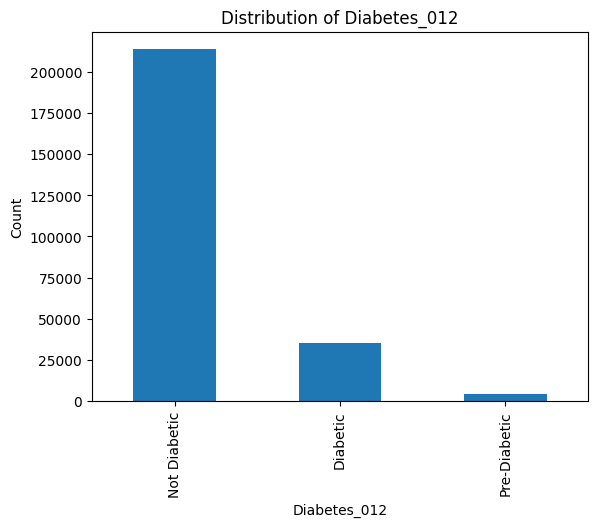

In [52]:
# Visualize the distribution of the target variable 'Diabetes_012'
df['Diabetes_012'].value_counts().plot(kind='bar', title='Distribution of Diabetes_012')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()


#### Model building

KNN Best Params: {'n_neighbors': 13}
KNN Accuracy: 0.5884
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     42795
           1       0.03      0.38      0.05       944
           2       0.31      0.47      0.37      6997

    accuracy                           0.59     50736
   macro avg       0.43      0.49      0.39     50736
weighted avg       0.84      0.59      0.68     50736

KNN Confusion Matrix:
[[26187  9448  7160]
 [  269   357   318]
 [ 1219  2468  3310]]


--------------------------------------------------------
NaiveBayes Accuracy: 0.6765
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     42795
           1       0.02      0.17      0.04       944
           2       0.33      0.53      0.41      6997

    accuracy                           0.68     50736
   macro avg       0.42      0.47      0.42     50736
weighted avg       0.82      0.68      0.73     50736

NaiveBa

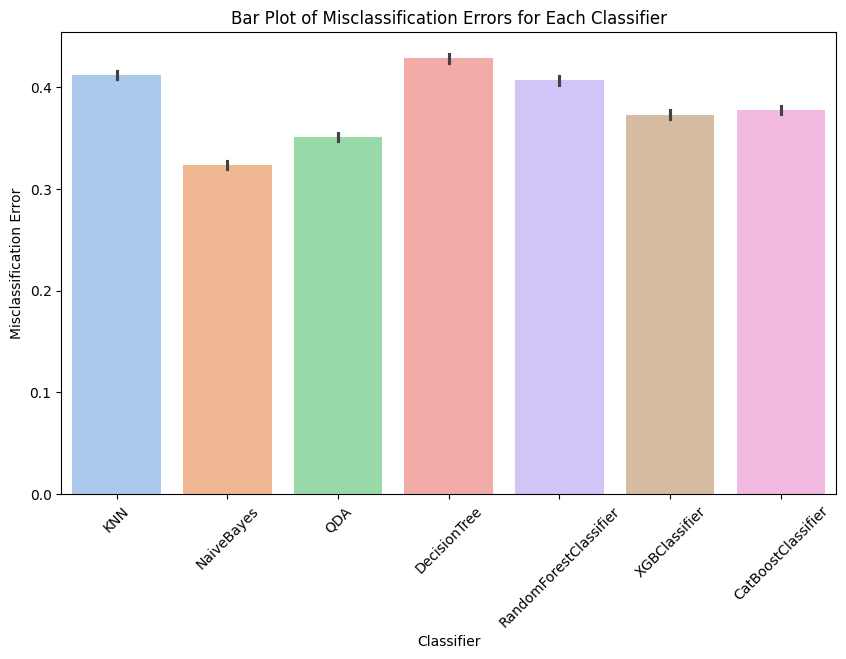

In [54]:
# Prepare the data
X = df.drop(['Diabetes_012','Smoker','HvyAlcoholConsump','Fruits','Veggies','Education'], axis=1)
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 2}
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training set
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
y_resampled = np.array(y_resampled).ravel()  # Flatten to 1D array

X_test = scaler.transform(X_test)

# Initialize classifiers with hyperparameter grids
classifiers = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': np.arange(5,15,2)}),
    'NaiveBayes': (GaussianNB(), {}),
    'QDA': (QuadraticDiscriminantAnalysis(), {}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'RandomForestClassifier':(RandomForestClassifier(),{'max_features': ['sqrt', 'log2'],
                                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                                        'min_samples_split': [2, 5, 10]}),
    'XGBClassifier':(XGBClassifier(objective='multi:softprob', use_label_encoder=False,
                                        eval_metric='mlogloss'),
                                        {'n_estimators': [100, 200, 300, 400, 500],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0, 0.01, 0.1, 1]}),
    'CatBoostClassifier':(CatBoostClassifier(verbose=0),{'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'depth': [4, 6, 8, 10],
                                        'l2_leaf_reg': [1, 3, 5, 10],
                                        'border_count': [32, 64, 128],
                                        'bagging_temperature': [0.5, 1, 2]})

}

# Create a custom scorer for multi-class ROC-AUC
def roc_auc_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)
    return roc_auc_score(y, y_proba, multi_class='ovr')

errors_df=pd.DataFrame()
model_scores={}
# Train and evaluate classifiers
for name, (clf, params) in classifiers.items():
    if params:
        # Perform grid search

        random_search = RandomizedSearchCV(clf, params, n_iter=10,scoring=roc_auc_scorer,
                                            cv=3,error_score='raise')
        random_search.fit(X_resampled, y_resampled)
        best_clf = random_search.best_estimator_
        print(f'{name} Best Params: {random_search.best_params_}')
    else:
        # Train the classifier without grid search
        best_clf = clf
        best_clf.fit(X_resampled, y_resampled)

    #model scores
    model_scores[name]=random_search.best_score_
    # Make predictions
    y_pred = best_clf.predict(X_test)

    # Evaluate the classifier
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred,zero_division=0))
    print(f'{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n\n')
    print('--------------------------------------------------------')

    # Calculate misclassification errors
    if name=='CatBoostClassifier':
        errors = (y_pred != np.array(y_test).reshape(-1,1)).astype(int)
        errors_df[name] = errors
    else:
        errors = (y_pred != y_test).astype(int)
        errors_df[name] = errors

    '''
    # Calculate ROC-AUC if applicable
    if hasattr(best_clf, "predict_proba"):
        if y_proba.ndim == 2 and y_proba.shape[1] > 1:
            y_proba = best_clf.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_proba,multi_class='ovr')
            print(f'{name} ROC-AUC: {roc_auc:.4f}\n')
'''

# Plot box plot of errors
plt.figure(figsize=(10, 6))
sns.barplot(errors_df,palette='pastel')
plt.title('Bar Plot of Misclassification Errors for Each Classifier')
plt.ylabel('Misclassification Error')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.show()




In [55]:
## Best scores for each model based on roc-auc
for model,score in model_scores.items():
    print(f"{model}-->{score}")

KNN-->0.6631681115353434
NaiveBayes-->0.6631681115353434
QDA-->0.6631681115353434
DecisionTree-->0.6401112508054122
RandomForestClassifier-->0.6877666485777626
XGBClassifier-->0.7085957383013012
CatBoostClassifier-->0.7106240642449605


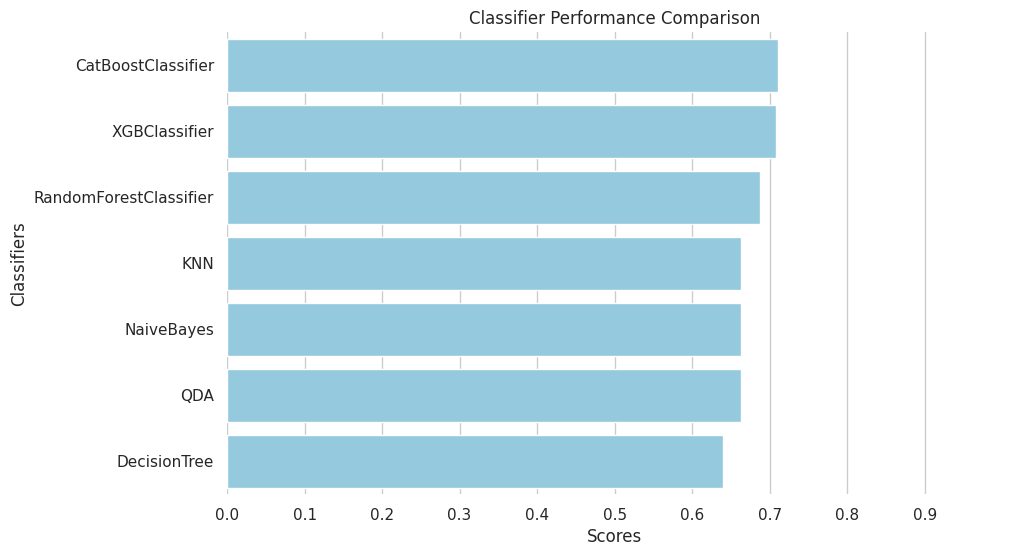

In [56]:
# plot of classifiers performance
# Data
classifiers = ['KNN', 'NaiveBayes', 'QDA', 'DecisionTree', 'RandomForestClassifier', 'XGBClassifier', 'CatBoostClassifier']
scores=list(model_scores.values())

# Create a DataFrame for easier sorting
data = pd.DataFrame({'Classifier': classifiers, 'Score': scores})

# Sort the data by scores
data = data.sort_values(by='Score', ascending=False)

# Set the style to minimal
sns.set(style="whitegrid")

# Create a horizontal bar plot with a simpler color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Classifier', data=data, color='skyblue', orient='h')

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Classifier Performance Comparison')
plt.xticks(np.arange(0,1,0.1))
plt.xlim(0, 1)

# Remove grid lines for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

CatBoostClassifier: Best performance with ROC-AUC of 0.7095.​

XGBClassifier (0.7065) and RandomForest (0.7008) also performed well.​

KNN, Naïve Bayes, and QDA showed moderate performance (~0.6633).​

DecisionTree had the lowest performance with ROC-AUC of 0.6382.​

To understand how well the features are able to separate the classes we shall perform 3D PCA

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import plotly.express as px
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_resampled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3'])
pca_df['Diabetes_012'] = y_resampled
pca_df['Diabetes_012'] = pca_df['Diabetes_012'].map({0: 'no diabetes', 1: 'pre-diabetes', 2: 'diabetes'})
pca_df['Diabetes_012'] = pca_df['Diabetes_012'].astype('category')

In [59]:
# Create the interactive 3D scatter plot
color_discrete_map = {
    'no diabetes': 'black',
    'pre-diabetes': 'green',
    'diabetes': 'red'
}
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Diabetes_012',
    title='3D PCA of Diabetes Dataset',
    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3', 'Diabetes_012': 'Diabetes status'},
    color_discrete_map=color_discrete_map
)

# Update the marker size
fig.update_traces(marker=dict(size=3))
# Show the plot
fig.show()

In [60]:
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Explained variance by PC3: {pca.explained_variance_ratio_[2]:.2f}")
print(f"Total explained variance by PC1, PC2, and PC3: {sum(pca.explained_variance_ratio_[:3]):.2f}")

Explained variance by PC1: 0.20
Explained variance by PC2: 0.11
Explained variance by PC3: 0.07
Total explained variance by PC1, PC2, and PC3: 0.38


From the 3D plot, we see that the no-diabetes class has a visible cluster but the remaining classes are mixed together with no clear separation. This could be as a result of the inability of the predictors to clearly tell prediabetic patients from diabetic patients.
<br>NOTE: while the PCA can be a useful technique in understanding classes based on its feature characteristics, it's important to note that ot does not capture non linear relationships between the class and features and also meaningful results from dimensionality reduction of high feature space becomes difficult

### **Guiding Question 3: Do the strongest predictors of diabetes in this dataset align with risk factors commonly identified in medical research?​**

#### Logstic Regression

As we observed from the EDA, our data is highly imbalanced, with a significant disparity in the number of samples across different categories of the dependent variable. Therefore, we perform oversampling to adjust the class distribution in the training data and improve model performance.

#### Multinomial Logistic Regression

Since our dependent variable consists of three categories—no diabetes, prediabetes and diabetes, so we choose to use a Multinomial Logistic Regression model.

#### Model regression

In [62]:
y = df["Diabetes_012"]
X = df.drop(columns=["Diabetes_012"])

categorical = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income"]
X[categorical] = X[categorical].astype("category")

X = pd.get_dummies(X, drop_first=True)
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 2}
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer
X = X.apply(pd.to_numeric, errors="coerce")
X = X.dropna()
X = X.astype(float)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = sm.add_constant(X_resampled)

model = sm.MNLogit(y_resampled, X_resampled)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.930783
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Diabetes_012   No. Observations:               641109
Model:                        MNLogit   Df Residuals:                   641017
Method:                           MLE   Df Model:                           90
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.1528
Time:                        04:30:17   Log-Likelihood:            -5.9673e+05
converged:                       True   LL-Null:                   -7.0433e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
        Diabetes_012=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.4812      0.191    -33.997      0.000      -6.855      

Strongest predictors for prediabetes rank (all significant): <br>
1. Cholesterol Check (CholCheck): 1.1333
2. Education Level (Education): 1.0136
3. General Health (GenHlth): 0.9612
4. High Cholesterol (HighChol): 0.7156
5. Household Income Level (Income): 0.5793
6. Heavy Alcohol Consumption (HvyAlcoholConsump): 0.4723


Strongest predictors for diabetes rank (all significant): <br>
1. General Health (GenHlth): 1.8682
2. Cholesterol Check (CholCheck): 1.6941
3. Heavy Alcohol Consumption (HvyAlcoholConsump): 1.3252
4. High Blood Pressure (HighBP): 0.9292
5. High Cholesterol (HighChol): 0.7590
6. Household Income Level (Income): 0.4661

#### Top six strongest predictors visualization

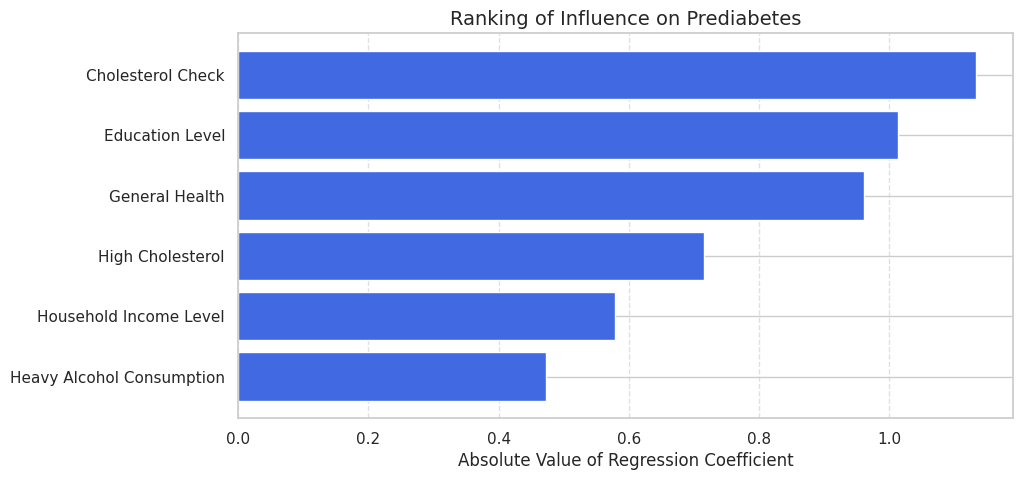

In [63]:
categories = [
    "Cholesterol Check",
    "Education Level",
    "General Health",
    "High Cholesterol",
    "Household Income Level",
    "Heavy Alcohol Consumption"
]
values = [1.1333, 1.0136, 0.9612, 0.7156, 0.5793, 0.4723]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(categories, values, color='royalblue')

ax.set_xlabel("Absolute Value of Regression Coefficient", fontsize=12)
ax.set_title("Ranking of Influence on Prediabetes", fontsize=14)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

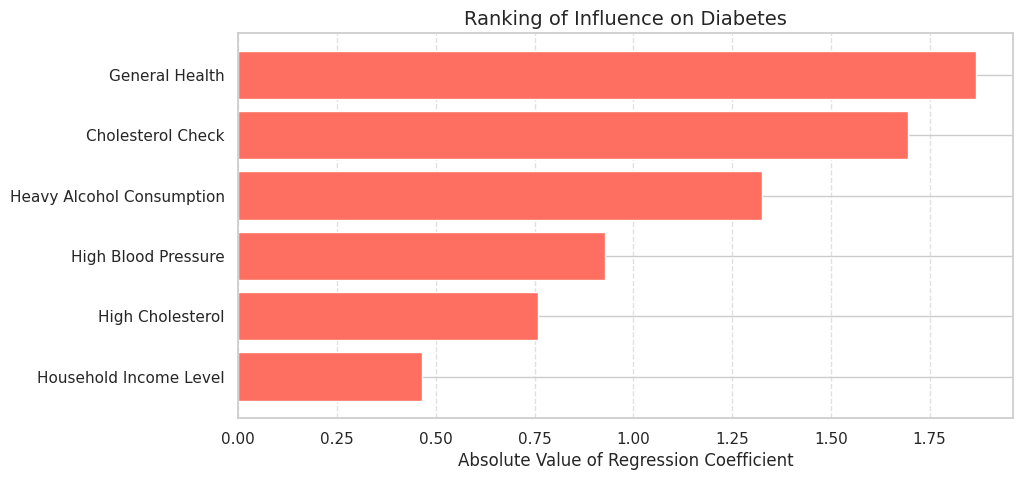

In [64]:
categories = [
    "General Health",
    "Cholesterol Check",
    "Heavy Alcohol Consumption",
    "High Blood Pressure",
    "High Cholesterol",
    "Household Income Level"
]
values = [1.8682, 1.6941, 1.3252, 0.9292, 0.7590, 0.4661]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(categories, values, color="#FF6F61")

ax.set_xlabel("Absolute Value of Regression Coefficient", fontsize=12)
ax.set_title("Ranking of Influence on Diabetes", fontsize=14)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

#### ROC AUC and Accuracy of the model

In [68]:
X = df.drop(columns=["Diabetes_012"])

categorical = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
               "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
               "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income"]
X[categorical] = X[categorical].astype("category")
X = pd.get_dummies(X, drop_first=True)

diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 2}
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer
X = X.apply(pd.to_numeric, errors="coerce").dropna().astype(float)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    X_train_res = sm.add_constant(X_train_res)
    X_test = sm.add_constant(X_test, has_constant='add')

    model = sm.MNLogit(y_train_res, X_train_res)
    result = model.fit(disp=0)

    y_pred_prob = result.predict(X_test).values

    auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')
    auc_scores.append(auc)

    y_pred = np.argmax(y_pred_prob, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Mean ROC AUC:", np.mean(auc_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))

Mean ROC AUC: 0.8128337614554585
Mean Accuracy: 0.6341414380321665


The ROC AUC of the Multinomial Logistic Regression model is 0.811847638235119, and the accyracy of the Multinomial Logistic Regression model is 0.6355132450331126.

#### Logit Regression (Prediabate and diabate)

Combine prediabate and diabate into a single category and perform Logit Regression. And now our independent variable only has two categories, so we can perform logit regression on the new dataset.

#### Model refression

In [69]:
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 1} # We are now classifying "Diabetic" and "Pre-diabetic" as "1"
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer

X = df.drop(columns=["Diabetes_012"])

categorical = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income"]
X[categorical] = X[categorical].astype("category")

X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce")
X = X.dropna()
X = X.astype(float)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = sm.add_constant(X_resampled)

model = sm.Logit(y_resampled, X_resampled)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505308
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:               427406
Model:                          Logit   Df Residuals:                   427360
Method:                           MLE   Df Model:                           45
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2710
Time:                        04:38:04   Log-Likelihood:            -2.1597e+05
converged:                       True   LL-Null:                   -2.9626e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.9833      0.159    -44.052      0.000      -7.294      

In [72]:
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 1} # We are now classifying "Diabetic" and "Pre-diabetic" as "1"
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer
X = df.drop(columns=["Diabetes_012", "Education", "Fruits", "MentHlth"])

categorical = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Income"]
X[categorical] = X[categorical].astype("category")

X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce")
X = X.dropna()
X = X.astype(float)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = sm.add_constant(X_resampled)

model = sm.Logit(y_resampled, X_resampled)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:               427406
Model:                          Logit   Df Residuals:                   427367
Method:                           MLE   Df Model:                           38
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2712
Time:                        04:41:28   Log-Likelihood:            -2.1592e+05
converged:                       True   LL-Null:                   -2.9626e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.9599      0.070    -99.991      0.000      -7.096      

In [73]:
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 1} # We are now classifying "Diabetic" and "Pre-diabetic" as "1"
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer
X = df.drop(columns=["Diabetes_012", "Education", "Fruits", "MentHlth", "Smoker"])

categorical = ["HighBP", "HighChol", "CholCheck", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Income"]
X[categorical] = X[categorical].astype("category")

X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce")
X = X.dropna()
X = X.astype(float)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = sm.add_constant(X_resampled)

model = sm.Logit(y_resampled, X_resampled)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505424
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:               427406
Model:                          Logit   Df Residuals:                   427368
Method:                           MLE   Df Model:                           37
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.2708
Time:                        04:41:59   Log-Likelihood:            -2.1602e+05
converged:                       True   LL-Null:                   -2.9626e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.9931      0.070    -99.652      0.000      -7.131      

**After delete all the insignificant variables:**

Strongest predictors for prediabetes or diabetes rank (all significant): <br>
1. General Health (GenHlth): 1.6268
2. Cholesterol Check (CholCheck): 1.5688
3. Heavy Alcohol Consumption (HvyAlcoholConsump_1.0): 1.0433
4. High Blood Pressure (HighBP): 0.8132
5. High Cholesterol (HighChol): 0.6656
6. Income Level (Income): 0.4940

#### Top six strongest predictors visualization

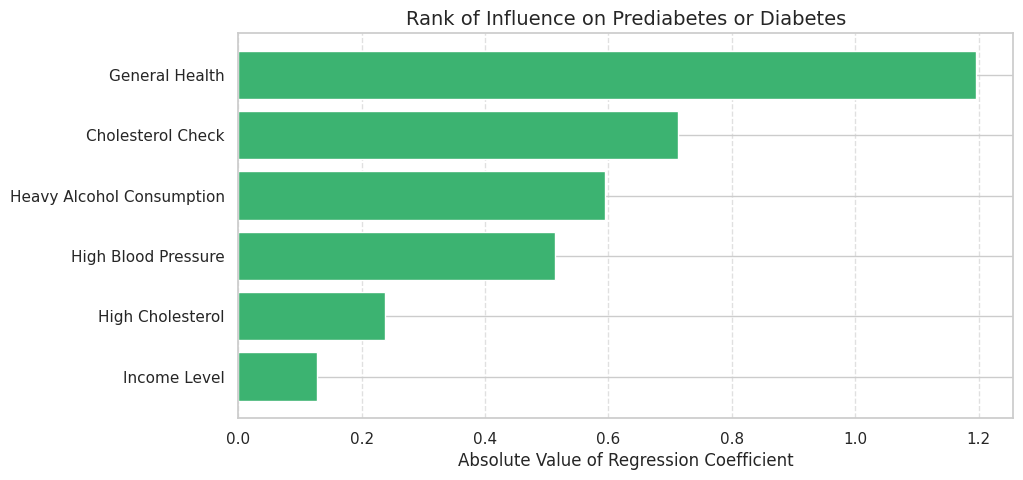

In [74]:
categories = [
    "General Health",
    "Cholesterol Check",
    "Heavy Alcohol Consumption",
    "High Blood Pressure",
    "High Cholesterol",
    "Income Level"
]
values = [1.1960, 0.7124, 0.5941, 0.5134, 0.2371, 0.1271]

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(categories, values, color='mediumseagreen')

ax.set_xlabel("Absolute Value of Regression Coefficient", fontsize=12)
ax.set_title("Rank of Influence on Prediabetes or Diabetes", fontsize=14)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

#### ROC AUC and Accuracy of the model

In [75]:
diabetes_mapping = {"Not Diabetic": 0, "Pre-Diabetic": 1, "Diabetic": 1} # We are now classifying "Diabetic" and "Pre-diabetic" as "1"
y = df['Diabetes_012'].map(diabetes_mapping).astype(int) # Convert target variable to integer
X = df.drop(columns=["Diabetes_012", "Education", "Fruits", "MentHlth", "Smoker"])

categorical = ["HighBP", "HighChol", "CholCheck", "Stroke", "HeartDiseaseorAttack",
               "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
               "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Income"]
X[categorical] = X[categorical].astype("category")
X = pd.get_dummies(X, drop_first=True)

X = X.apply(pd.to_numeric, errors="coerce").dropna().astype(float)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    X_train_res = sm.add_constant(X_train_res)
    X_test = sm.add_constant(X_test, has_constant='add')

    model = sm.Logit(y_train_res, X_train_res)
    result = model.fit(disp=0)

    y_pred_prob = result.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    auc = roc_auc_score(y_test, y_pred_prob)
    acc = accuracy_score(y_test, y_pred)

    auc_scores.append(auc)
    accuracy_scores.append(acc)

print("Mean ROC AUC:", np.mean(auc_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))

Mean ROC AUC: 0.8168254408090615
Mean Accuracy: 0.7257332071901608


The ROC AUC of the logit model is 0.8153270990952122, and the accuracy is 0.7257134973194577. The performance of the logit model is slightly better than that of the multinomial logit model.

#### Best Model Selection:

#### Best model from guiding question 1

We have performed many kinds of models on this dataset in guiding question 1, so we can choose a best model from guiding question 1 first, and compared it with the logit model and multinomial logit model. <br>
Although we have performed some resampling methods to make the data more balance, the data can still be not perfect in balancing. So ROC AUC will be given more consideration when we select the best model.

#### ROC AUCs and accurracies of all the models from guiding question 1

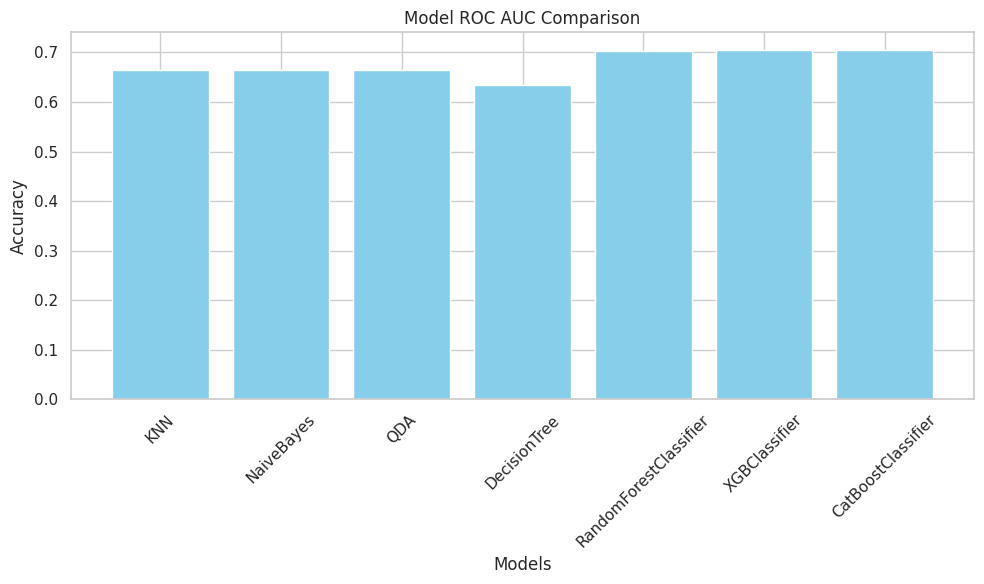

In [76]:
models = ['KNN', 'NaiveBayes', 'QDA', 'DecisionTree', 'RandomForestClassifier', 'XGBClassifier', 'CatBoostClassifier']

accuracy = [0.663714456756522, 0.663714456756522, 0.663714456756522, 0.6342490188112097,
            0.7030479104373417, 0.7054308053814159, 0.7041327665231546]

plt.figure(figsize=(10,6))
plt.bar(models, accuracy, color='skyblue')

plt.title('Model ROC AUC Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

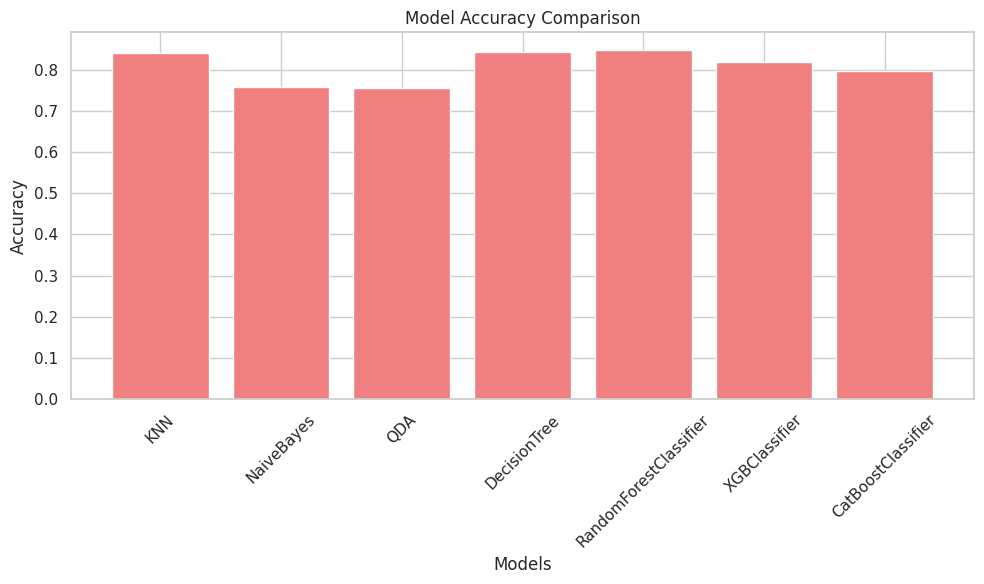

In [77]:
models = ['KNN', 'NaiveBayes', 'QDA', 'DecisionTree', 'RandomForestClassifier', 'XGBClassifier', 'CatBoostClassifier']

accuracy = [0.8410004686024408, 0.7570561231019586, 0.7545332539943885, 0.8441294195605951,
            0.8482832693972018, 0.818216387126, 0.79721681726322]

plt.figure(figsize=(10,6))
plt.bar(models, accuracy, color='lightcoral')  # Changed color to light coral

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see from the two bar charts, the Random Forest Classifier model has the best ROC AUC, and the accuracy of the Random Forest Classifier model have the rank of 3 and the gap compared to the top two is very small. So Random Forest Classifier model is the best model from guiding question 1. And then we can compare it with the two new model we have.ncome Level​

#### Final best model selection

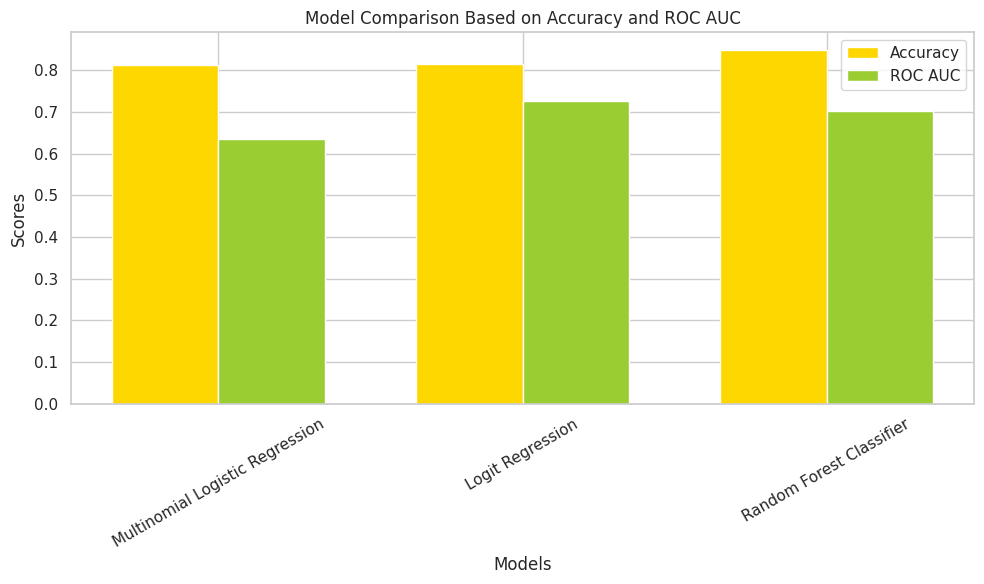

In [78]:
models = ['Multinomial Logistic Regression', 'Logit Regression', 'Random Forest Classifier']

accuracy = [0.811847638235119, 0.8153270990952122, 0.848283269397]

roc_auc = [0.6355132450331126, 0.7257134973194577, 0.703047910437]

x = np.arange(len(models))

width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='gold')  # Color set to gold
bars2 = ax.bar(x + width/2, roc_auc, width, label='ROC AUC', color='yellowgreen')  # Color set to yellowgreen

ax.set_title('Model Comparison Based on Accuracy and ROC AUC')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)
ax.legend()

plt.tight_layout()
plt.show()

The logit regression model has the highest ROC AUC and the accuracy is second only to the random forest classifier model. As we mentioned before, ROC AUC is a more important metric for our comparison. So taking into account accuracy and ROC AUC, the best model is logit regression, and the strongest predictors given by this model are: ​
1. General Health​
2. Cholesterol Check​
3. Heavy Alcohol Consumption​
4. High Blood Pressure​
5. High Cholesterol​
6. Income Level​
And this is our final answer and conclusion for this guiding question.

#### Comparing with Medical Research

Our analysis confirms major risk factors for diabetes, including high cholesterol, high blood pressure, BMI, and general health. These align with medical research, emphasizing their impact on insulin resistance and Type 2 diabetes. Additionally, our models highlight heavy alcohol consumption as a significant predictor, a factor that is not widely emphasized in medical research. The random forest analysis further shows that BMI and age are crucial determinants of diabetes risk. These findings suggest that lifestyle factors, and medical indicators, play key roles in predicting diabetes.

While some of our findings align with medical research, there are notable differences. One key distinction is that our models identified cholesterol checks as a strong predictor, whereas medical research focuses on actual cholesterol levels. This suggests that individuals who do cholesterol testing more frequently are more health-conscious or have better access to healthcare. Additionally, our findings highlight the significant role of socioeconomic factors such as income and education levels in impacting diabetes risk, an area most medical research does not pay attention to.

## **Conclusion**

Our analysis successfully identified major predictors of diabetes using machine learning and statistical modelling. The findings reinforce well-established risk factors, such as BMI, high cholesterol, high blood pressure, and general health status, which are widely supported in medical literature. These factors play a crucial role in insulin resistance and the development of Type 2 diabetes. Additionally, our study highlights heavy alcohol consumption as a significant predictor, an aspect less emphasized in traditional research. This suggests that lifestyle behaviours, beyond diet and physical activity, may have a more substantial impact on diabetes risk than previously considered.

Beyond biological indicators, our study emphasizes the role of socioeconomic factors, such as income and education level, in diabetes risk. While medical literature primarily focuses on physiological and metabolic factors, our findings suggest that individuals with lower income and education levels are at higher risk of developing diabetes. This underscores the need to integrate social determinants of health into diabetes prevention strategies. Another key distinction is the importance of cholesterol checks—our analysis found that the frequency of cholesterol testing is a strong predictor of diabetes, whereas existing research primarily focuses on cholesterol levels. This may reflect differences in healthcare access and health-conscious behaviours rather than direct biological causation.

In conclusion, our findings suggest that early screening, lifestyle modifications, and improved healthcare accessibility are critical in reducing diabetes risk. The study highlights the importance of adopting a comprehensive approach that incorporates both medical and social determinants when assessing diabetes risk. Future research should further explore longitudinal trends, genetic predispositions, and real-world applications, particularly in integrating predictive models into healthcare decision-making. By considering both biological and socioeconomic factors, public health interventions can be more effectively tailored to mitigate diabetes prevalence and improve long-term health outcomes.

## **Task Division**

#### Background & Data Selection - Arthur

#### Preliminary Data Analysis - Sihan

#### Statistical Analysis  & Interpretation:

#### Guiding Question 1 - Arthur

#### Guiding Question 2 - Ekene

#### Guiding Question 3 - Zhaoye & Weiwei

#### Conclusion - Weiwei

## **Reference**

1. UCI Machine Learning Repository. (n.d.). CDC Diabetes Health Indicators Data Set. Retrieved from https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

2. Nature. (2024). A machine learning-based approach to predict diabetes mellitus using clinical and laboratory features. Scientific Reports, 14, 52023. Retrieved from https://www.nature.com/articles/s41598-024-52023-5

3. Mayo Clinic. (2024). Diabetes: Symptoms and causes. Retrieved from https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

4. Diabetes Journals. (2007). Long-term predictors of insulin resistance: Role of lifestyle and metabolic factors in the development of insulin resistance syndrome. Diabetes Care, 30(11), 2928-2933. Retrieved from https://diabetesjournals.org/care/article/30/11/2928/4833/Long-Term-Predictors-of-Insulin-ResistanceRole-of

5. Centers for Disease Control and Prevention (CDC). (2015). Behavioral Risk Factor Surveillance System (BRFSS) - Multiyear Data Sets. Retrieved from https://www.cdc.gov/brfss/annual_data/2015/llcp_multiq.html

6. Teboul, A. (n.d.). Diabetes Health Indicators Dataset. Retrieved from https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook

7. Data Commons. (n.d.). United States Population. Retrieved from https://datacommons.org/place/country/USAutm_medium=explore&mprop=count&popt=Person&hl=en#

8. Economic Research Service (ERS), USDA. (2023). Researchers Adjust Self-Reported Estimates of Obesity in Scanner Data. Retrieved from https://www.ers.usda.gov/amber-waves/2023/november/researchers-adjust-self-reported-estimates-of-obesity-in-scanner-data

9. Statistics by Jim. (n.d.). Factor Analysis. Retrieved from https://statisticsbyjim.com/basics/factor-analysis/

10. Scientific Research Publishing. (2018). Factor Analysis: A Study. Open Journal of Social Sciences, 6, 394-401. Retrieved from https://www.scirp.org/journal/paperinformation?paperid=87940

11. Newsom, J. (n.d.). Exploratory and Confirmatory Factor Analysis. Retrieved from https://web.pdx.edu/~newsomj/pmclass/EFA%20and%20CFA.pdf

12. U.S. Bureau of Labor Statistics (BLS). (2015). Median weekly earnings by education, gender, race, and ethnicity in 2014. The Economics Daily. Retrieved from https://www.bls.gov/opub/ted/2015/median-weekly-earnings-by-education-gender-race-and-ethnicity-in-2014.html

13. U.S. Census Bureau. (2016). Income and Poverty in the United States: 2015. Retrieved from https://www.census.gov/content/dam/Census/library/publications/2016/demo/p20-578.pdf